# TALLER DE SELECCIÓN DE MODELOS

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes

from array import array

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rc('font', family='serif')

**ERROR DE LA TAREA ANTERIOR** [(taller de regresión lineal)](https://github.com/srcolinas/Machine_Learning_basico/blob/master/regresion_lineal.ipynb)
*NUNCA* se debe buscar el mejor modelo utilizando como referencia los datos de prueba. Para esto se deben usar unos datos validación, los cuales salen de los datos de entrenamiento y no se usan para entrenar. Una vez se escoja el mejor modelo, este se puede reentrenar usando todos los datos de entrenamiento disponibles.

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
poly = PolynomialFeatures(degree=1)
X_train, X_test, y_train, y_test = train_test_split(poly.fit_transform(X), y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [5]:
error_train = array('f')
error_val = array('f')
for alpha in np.arange(0, 3, 0.3):
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X_train, y_train)
    print("-----------Usando alpha={}---------------".format(alpha))
    MAE_train = float(mean_absolute_error(y_train, ridge_regressor.predict(X_train)))
    print('Error de entrenamiento:',MAE_train)
    error_train.append(MAE_train)
    MAE_val = float(mean_absolute_error(y_val, ridge_regressor.predict(X_val)))
    print('Error de validación:', MAE_val)
    error_val.append(MAE_val)
    print('Coeficiente más grande:', np.max(ridge_regressor.coef_.reshape(-1)))
    print('Coeficiente más pequeño:', np.min(ridge_regressor.coef_.reshape(-1)))
    print('Numero de zeros:', np.sum(np.abs(ridge_regressor.coef_.reshape(-1))<0.0001))

-----------Usando alpha=0.0---------------
Error de entrenamiento: 46.09243702175708
Error de validación: 42.0944834706984
Coeficiente más grande: 665.464572792
Coeficiente más pequeño: -315.667649655
Numero de zeros: 1
-----------Usando alpha=0.3---------------
Error de entrenamiento: 48.983786697002046
Error de validación: 43.842445674194636
Coeficiente más grande: 432.498344326
Coeficiente más pequeño: -177.559428162
Numero de zeros: 1
-----------Usando alpha=0.6---------------
Error de entrenamiento: 51.6661873055898
Error de validación: 45.78455466485999
Coeficiente más grande: 327.946668105
Coeficiente más pequeño: -143.635229574
Numero de zeros: 1
-----------Usando alpha=0.8999999999999999---------------
Error de entrenamiento: 53.796118221915776
Error de validación: 47.475956687551204
Coeficiente más grande: 266.939333297
Coeficiente más pequeño: -122.190947781
Numero de zeros: 1
-----------Usando alpha=1.2---------------
Error de entrenamiento: 55.43163863082046
Error de valid

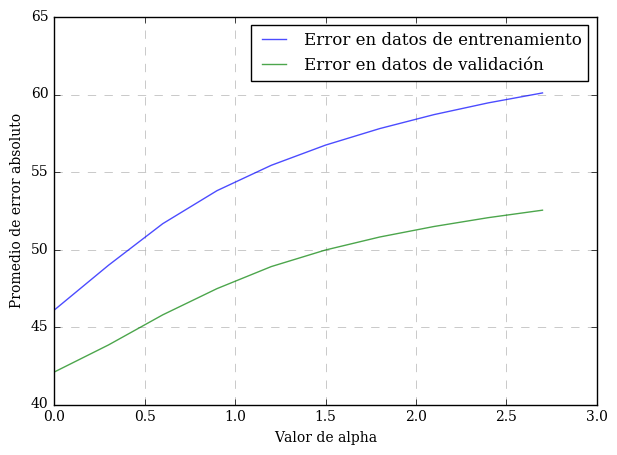

In [6]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)

ax.plot(np.arange(0, 3, 0.3), error_train, color='b', alpha=0.7, label='Error en datos de entrenamiento')
ax.plot(np.arange(0, 3, 0.3), error_val, color='g', alpha=0.7, label='Error en datos de validación')

ax.grid(linestyle='--',color='0.7')
ax.set_ylabel('Promedio de error absoluto')
ax.set_xlabel('Valor de alpha')
ax.legend(loc='best')

In [7]:
error_train = array('f')
error_val = array('f')
for alpha in np.arange(0, 3, 0.3):
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
    print("-----------Usando alpha={}---------------".format(alpha))
    MAE_train = float(mean_absolute_error(y_train, lasso_regressor.predict(X_train)))
    print('Error de entrenamiento:',MAE_train)
    error_train.append(MAE_train)
    MAE_val = float(mean_absolute_error(y_val, lasso_regressor.predict(X_val)))
    print('Error de validación:', MAE_val)
    error_val.append(MAE_val)
    print('Coeficiente más grande:', np.max(lasso_regressor.coef_.reshape(-1)))
    print('Coeficiente más pequeño:', np.min(lasso_regressor.coef_.reshape(-1)))
    print('Numero de zeros:', np.sum(np.abs(lasso_regressor.coef_.reshape(-1))<0.0001))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


-----------Usando alpha=0.0---------------
Error de entrenamiento: 46.092437021762635
Error de validación: 42.09448347074858
Coeficiente más grande: 665.464572794
Coeficiente más pequeño: -315.667649678
Numero de zeros: 1
-----------Usando alpha=0.3---------------
Error de entrenamiento: 48.18298800004848
Error de validación: 44.79057950492783
Coeficiente más grande: 646.417073687
Coeficiente más pequeño: -141.027391378
Numero de zeros: 7
-----------Usando alpha=0.6---------------
Error de entrenamiento: 50.34841852527462
Error de validación: 46.59237440274436
Coeficiente más grande: 600.194838639
Coeficiente más pequeño: -36.4395353867
Numero de zeros: 7
-----------Usando alpha=0.8999999999999999---------------
Error de entrenamiento: 53.228014792448796
Error de validación: 48.86776905199243
Coeficiente más grande: 537.321773395
Coeficiente más pequeño: 0.0
Numero de zeros: 8
-----------Usando alpha=1.2---------------
Error de entrenamiento: 56.44888858234789
Error de validación: 51.4

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


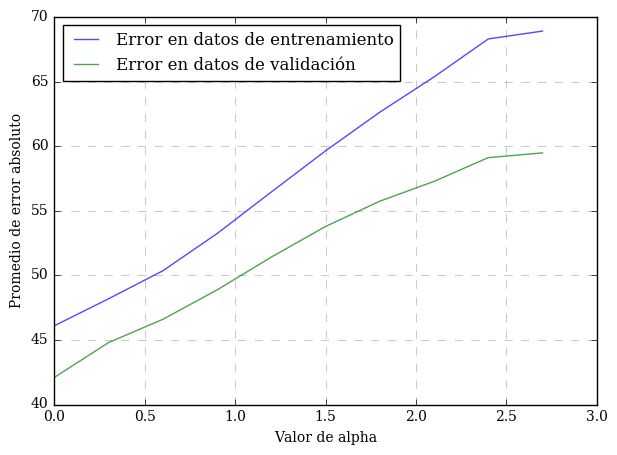

In [8]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)

ax.plot(np.arange(0, 3, 0.3), error_train, color='b', alpha=0.7, label='Error en datos de entrenamiento')
ax.plot(np.arange(0, 3, 0.3), error_val, color='g', alpha=0.7, label='Error en datos de validación')

ax.grid(linestyle='--',color='0.7')
ax.set_ylabel('Promedio de error absoluto')
ax.set_xlabel('Valor de alpha')
ax.legend(loc='best')

**Qué grado del polinomio se debe escoger?**

In [ ]:
error_train = array('f')
error_val = array('f')
for i in range(1,5):
    poly = PolynomialFeatures(degree=1)
    X_train, X_test, y_train, y_test = train_test_split(poly.fit_transform(X), y, test_size=0.33, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_val)
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
    print("-----------Usando alpha={}---------------".format(alpha))
    MAE_train = float(mean_absolute_error(y_train, lasso_regressor.predict(X_train)))
    print('Error de entrenamiento:',MAE_train)
    error_train.append(MAE_train)
    MAE_val = float(mean_absolute_error(y_val, lasso_regressor.predict(X_val)))
    print('Error de validación:', MAE_val)
    error_val.append(MAE_val)
    print('Coeficiente más grande:', np.max(lasso_regressor.coef_.reshape(-1)))
    print('Coeficiente más pequeño:', np.min(lasso_regressor.coef_.reshape(-1)))
    print('Numero de zeros:', np.sum(np.abs(lasso_regressor.coef_.reshape(-1))<0.0001))